In [14]:
import pandas as pd
import numpy as np
import re

In [15]:
%pwd

'C:\\Users\\baudant\\OneDrive - BEFIVE\\italians_do_it_better\\M_MERGE'

In [16]:
#################################################
# 1) FUNCTIONS                                  #
#################################################

In [17]:
import sys
sys.path.append('../')
from func import *

#DEFINED FUNCTIONS :
    
#unique_clean(data,col,pr=0)

#df_with_text(data,col,text)
#text_in_df(data,col,text)
#two_text_in_df(data,col,text1,text2)
#two_text_in_df(data,col,text1,text2='')

#values_U_not_nan(data,col_name)
#not_nan_get_values(data,col_name,pr=0)
#not_nan_get_index(data, col_name, pr=0)
#nan_get_index(data, col_name, pr=0)

#is_not_decimal(a)
#is_not_13(a)
#split_text_left(text_to_split,text)
#split_item_left(st)
#split_item_right(st)

#find_weight(text):     #s = re.compile('\d+G') extracts '210G'

In [13]:
#################################################
# 2) O_PROD_N_EAN13 from Open food Facts (EAN13)           #
#################################################

In [142]:
#Import from openFF
df_O_PROD = pd.read_csv('../O_OPENFF/output_data/O_products_EAN13.csv', index_col=0)

df_O_PROD['EAN13'] = df_O_PROD['EAN13'].astype(str)

#Creation of a column with ones to count product matches with groupby method
df_O_PROD['COUNT'] = 1
df_O_PROD['date_modified'] = df_O_PROD['interface_version_modified'].apply(lambda row : split_text_left(row, '.'))

In [143]:
df_O_PROD.shape

(1100, 45)

In [144]:
df_O_PROD['date_modified']

0       20150316
1       20120622
2       20120622
3       20150316
4       20150316
          ...   
1095    20150316
1096    20190830
1097    20150316
1098    20120622
1099    20150316
Name: date_modified, Length: 1100, dtype: object

In [145]:
df_O_PROD.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1100 entries, 0 to 1099
Data columns (total 45 columns):
EAN13                                                    1100 non-null object
product_name_fr                                          1063 non-null object
product_name                                             1090 non-null object
brands                                                   896 non-null object
brands_tags_str                                          912 non-null object
brands_tags                                              912 non-null object
serving_size                                             92 non-null object
serving_quantity                                         92 non-null float64
countries_hierarchy                                      1100 non-null object
cities_tags                                              588 non-null object
manufacturing_places                                     213 non-null object
purchase_places                            

In [146]:
#Adding O_ in front of each column name of df_O_PROD
if not df_O_PROD.columns[0][0:2] == 'O_' :
    for c in df_O_PROD.columns :
        df_O_PROD.rename(columns={c : 'O_' + c}, inplace=True)

In [147]:
df_O_PROD.head()

,O_EAN13,O_product_name_fr,O_product_name,O_brands,O_brands_tags_str,O_brands_tags,O_serving_size,O_serving_quantity,O_countries_hierarchy,O_cities_tags,...,O_sugars_100g,O_fruits_vegetables_nuts_estimate_from_ingredients_100g,O_proteins_100g,O_sodium_100g,O_salt_100g,O_nutrition_score_fr_100g,O_fiber_100g,O_nova_group_100g,O_COUNT,O_date_modified
0,3017239003969,Sauce aux Olives Provençale,Sauce aux Olives Provençale,Tramier,['tramier'],['tramier'],NaN,NaN,['en:france'],[],...,2.7,53.166667,1.3,0.84,2.10,10.0,NaN,3.0,1,20150316
1,3017239003976,Sauce aux olives façon pesto vert,Sauce aux olives façon pesto vert,Tramier,['tramier'],['tramier'],NaN,NaN,['en:france'],[],...,2.6,0.000000,1.7,0.30,0.75,8.0,NaN,4.0,1,20120622
2,3017239003983,Sauce aux olives façon pesto rosso,Sauce aux olives façon pesto rosso,Tramier,['tramier'],['tramier'],190g,190.0,['en:france'],[],...,4.3,46.000000,2.8,0.48,1.20,7.0,NaN,4.0,1,20120622
3,3017239003990,NaN,Sauce aux Olives Citron Confit,Tramier,['tramier'],['tramier'],NaN,NaN,['en:france'],NaN,...,3.5,NaN,1.4,0.56,1.40,NaN,NaN,NaN,1,20150316
4,3017239004003,Sauce aux olives champignons,Sauce aux olives champignons,Tramier,['tramier'],['tramier'],NaN,NaN,['en:france'],[],...,2.5,36.000000,1.5,0.48,1.20,7.0,NaN,4.0,1,20150316


In [1]:
###################################################
# 3) Creation of N_PROD from Nielsen               #
###################################################

In [2]:
###################################################
# 3.1) N_PROD from Nielsen (select MARKET and KPI) 

In [45]:
#Import from NIELSEN (8 MARKET * 17 KPI * 1425 EAN13)
df_N_ALL = pd.read_csv('../N_NIELSEN/output_data/N_ALL_DATA_preprocessed.csv',index_col=0)
df_N_ALL['EAN13']=df_N_ALL['EAN13'].astype(str)
#df_N_PROD.reset_index(inplace=True)
df_N_ALL.shape

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(209040, 51)

In [19]:
df_N_ALL.columns

Index(['MARKET_INITIAL', 'FACTS', 'NIELSEN_DESCRIPTION', 'EMBALLAGE', 'MARQUE',
       'GAMME', 'FORMAT', 'RECETTES', 'COMPTE', 'STD/PROMO', 'ITEM',
       'CAM_AN-1', 'DERNIER_CAM', '4_S_28/01/18', '4_S_25/02/18',
       '4_S_25/03/18', '4_S_22/04/18', '4_S_20/05/18', '4_S_17/06/18',
       '4_S_15/07/18', '4_S_12/08/18', '4_S_09/09/18', '4_S_07/10/18',
       '4_S_04/11/18', '4_S_02/12/18', '4_S_30/12/18', '4_S_27/01/19',
       '4_S_24/02/19', '4_S_24/03/19', '4_S_21/04/19', '4_S_19/05/19',
       '4_S_16/06/19', '4_S_14/07/19', '4_S_11/08/19', '4_S_08/09/19',
       '4_S_06/10/19', '4_S_03/11/19', '4_S_01/12/19', '4_S_29/12/19', 'EAN13',
       'MARKET', 'KPI', 'CATEGORY', 'ORGANIC', 'WEIGHT', 'INITIAL_INDEX',
       'EAN_promo', 'EAN13_num', 'SAME_PRODUCT', 'LONG_BRAND', 'WEIGHT_num',
       'N_COUNT'],
      dtype='object')

In [20]:
df_N_ALL[['MARKET', 'KPI', 'CATEGORY', 'EMBALLAGE', 'MARQUE', 'SAME_PRODUCT', 'DERNIER_CAM']].head(20)

,MARKET,KPI,CATEGORY,EMBALLAGE,MARQUE,SAME_PRODUCT,DERNIER_CAM
0,HMSM | PROXI | DRIVE | SDMP,NaN,NaN,NaN,NaN,NaN,NaN
1,HMSM | PROXI | DRIVE | SDMP,Ventes_Volume,NaN,NaN,NaN,NaN,NaN
2,HMSM | PROXI | DRIVE | SDMP,Ventes_Volume,AUT_SCE,NaN,NaN,NaN,586027.1
3,HMSM | PROXI | DRIVE | SDMP,Ventes_Volume,AUT_SCE,AUT_EMB,NaN,NaN,1408.6
4,HMSM | PROXI | DRIVE | SDMP,Ventes_Volume,AUT_SCE,AUT_EMB,AUT_MQ,NaN,1408.6
5,HMSM | PROXI | DRIVE | SDMP,Ventes_Volume,AUT_SCE,AUT_EMB,AUT_MQ,AUT_MQ | SCE_CLAS | CITRON_VERT_PIMENT_DOUX | ...,2.7
6,HMSM | PROXI | DRIVE | SDMP,Ventes_Volume,AUT_SCE,AUT_EMB,AUT_MQ,AUT_MQ | SCE_CLAS | CURRY_JAUNE_THAI | AUT_EMB...,803.5
7,HMSM | PROXI | DRIVE | SDMP,Ventes_Volume,AUT_SCE,AUT_EMB,AUT_MQ,AUT_MQ | SCE_CLAS | CURRY_VERT_&_LEGUMES | AUT...,602.5
8,HMSM | PROXI | DRIVE | SDMP,Ventes_Volume,AUT_SCE,AUT_EMB,AUT_MQ,AUT_MQ | SCE_CLAS | YUZU | AUT_EMB | NON_BIO,0.0
9,HMSM | PROXI | DRIVE | SDMP,Ventes_Volume,AUT_SCE,BRIC,NaN,NaN,30922.6


In [21]:
# list of all the markets
MARKET_U = pd.DataFrame(unique_clean(df_N_ALL,'MARKET'), columns =['MARKET'])
market_short = ['France','Hyper-Supermarkets','Supermarkets','Supermarkets small','Supermarkets big','Paris Region','MONOPRIX shops','FRANPRIX shops']
MARKET_U['MARKET_SHORT']=market_short
comments=['including hard discounter and cash & carry','Hyper > 4.000 m2 (to be confirmed)','','', '','','city center large shops','city center medium shops']
MARKET_U['MARKET_COMMENTS'] = comments
MARKET_U


number of  MARKET  unique (non null) values:  8
<class 'list'> 



,MARKET,MARKET_SHORT,MARKET_COMMENTS
0,HMSM | PROXI | DRIVE | SDMP,France,including hard discounter and cash & carry
1,ENSEIGNES_HMSM,Hyper-Supermarkets,Hyper > 4.000 m2 (to be confirmed)
2,ENSEIGNES_SM,Supermarkets,
3,SM_/_MAGS_<_2000_M2,Supermarkets small,
4,SM_/_MAGS_>_2000_M2,Supermarkets big,
5,REGION_1_IDF_(HMSM),Paris Region,
6,MONOPRIX,MONOPRIX shops,city center large shops
7,FRANPRIX,FRANPRIX shops,city center medium shops


In [22]:
#list of 17 KPI
KPI_U = pd.DataFrame(unique_clean(df_N_ALL,'KPI'), columns =['KPI'])
KPI_U


number of  KPI  unique (non null) values:  17
<class 'list'> 



,KPI
0,Ventes_Volume
1,Ventes_Valeur
2,Prix_Moyen
3,Prix_Moyen_UC
4,DN
5,DV
6,VMH_Pondérées
7,VMH_UC_Pond.
8,CA_Moyen_Hebdo_Pond.
9,Poids_des_Ventes_Volume_Promo


In [54]:
#Select Market and KPI
#creation of df_N_prod (1 MARKET * 1 KPI * 1425 PRODUCTS)
MARKET = 'HMSM | PROXI | DRIVE | SDMP' # France
KPI = 'Ventes_Valeur'
MKT_SEGMENT_AND_KPI = (df_N_ALL['KPI'] == KPI) & (df_N_ALL['MARKET'] == MARKET)
df_N_PROD = df_N_ALL[MKT_SEGMENT_AND_KPI]

df_N_PROD.rename(columns={'CAM_AN-1' : KPI + '_2018', 'DERNIER_CAM' : KPI + '_2019'}, inplace=True)
df_N_PROD['COUNT'] = 1

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [55]:
#list of BRANDS
brand_U = pd.DataFrame(unique_clean(df_N_ALL,'MARQUE'), columns =['MARQUE'])
brand_U


number of  MARQUE  unique (non null) values:  32
<class 'list'> 



,MARQUE
0,AUT_MQ
1,MDD
2,BARILLA
3,FLORELLI
4,ITALIANS_DO_IT_BETTER
5,JARDIN_BIO
6,MQ_FAB_1_PRX
7,SACLA
8,SUZY_WAN
9,UNC_BENS


In [56]:
#Adding N_ in front of each column name 
if not df_N_PROD.columns[0][0:2] == 'N_' :
    for c in df_N_PROD.columns :
        df_N_PROD.rename(columns={c : 'N_' + c}, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [57]:
df_N_PROD.columns

Index(['N_MARKET_INITIAL', 'N_FACTS', 'N_NIELSEN_DESCRIPTION', 'N_EMBALLAGE',
       'N_MARQUE', 'N_GAMME', 'N_FORMAT', 'N_RECETTES', 'N_COMPTE',
       'N_STD/PROMO', 'N_ITEM', 'N_Ventes_Valeur_2018', 'N_Ventes_Valeur_2019',
       'N_4_S_28/01/18', 'N_4_S_25/02/18', 'N_4_S_25/03/18', 'N_4_S_22/04/18',
       'N_4_S_20/05/18', 'N_4_S_17/06/18', 'N_4_S_15/07/18', 'N_4_S_12/08/18',
       'N_4_S_09/09/18', 'N_4_S_07/10/18', 'N_4_S_04/11/18', 'N_4_S_02/12/18',
       'N_4_S_30/12/18', 'N_4_S_27/01/19', 'N_4_S_24/02/19', 'N_4_S_24/03/19',
       'N_4_S_21/04/19', 'N_4_S_19/05/19', 'N_4_S_16/06/19', 'N_4_S_14/07/19',
       'N_4_S_11/08/19', 'N_4_S_08/09/19', 'N_4_S_06/10/19', 'N_4_S_03/11/19',
       'N_4_S_01/12/19', 'N_4_S_29/12/19', 'N_EAN13', 'N_MARKET', 'N_KPI',
       'N_CATEGORY', 'N_ORGANIC', 'N_WEIGHT', 'N_INITIAL_INDEX', 'N_EAN_promo',
       'N_EAN13_num', 'N_SAME_PRODUCT', 'N_LONG_BRAND', 'N_WEIGHT_num',
       'N_COUNT'],
      dtype='object')

In [58]:
df_N_PROD.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1537 entries, 1538 to 3074
Data columns (total 52 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   N_MARKET_INITIAL       0 non-null      object 
 1   N_FACTS                1 non-null      object 
 2   N_NIELSEN_DESCRIPTION  1536 non-null   object 
 3   N_EMBALLAGE            1534 non-null   object 
 4   N_MARQUE               1518 non-null   object 
 5   N_GAMME                1432 non-null   object 
 6   N_FORMAT               1432 non-null   object 
 7   N_RECETTES             1432 non-null   object 
 8   N_COMPTE               1432 non-null   object 
 9   N_STD/PROMO            1432 non-null   object 
 10  N_ITEM                 1432 non-null   object 
 11  N_Ventes_Valeur_2018   1536 non-null   float64
 12  N_Ventes_Valeur_2019   1536 non-null   float64
 13  N_4_S_28/01/18         1536 non-null   float64
 14  N_4_S_25/02/18         1536 non-null   float64
 15  N

In [59]:
##############################################@
# 3.2) Column selection for DF_N_PROD

In [60]:
#Select columns
new_cols = ['N_EAN13', 'N_MARQUE','N_SAME_PRODUCT', 'N_GAMME','N_RECETTES', 'N_ORGANIC', 'N_FORMAT','N_WEIGHT_num', 'N_EMBALLAGE', 
     'N_COMPTE', 'N_STD/PROMO', 'N_Ventes_Valeur_2019', 'N_Ventes_Valeur_2018', 'N_ITEM',
    'N_NIELSEN_DESCRIPTION', 'N_INITIAL_INDEX', 'N_CATEGORY','N_COUNT']

df_N_PROD = df_N_PROD[new_cols]


In [61]:
df_N_PROD.shape

(1537, 18)

In [62]:
##############################################@
# 3.3) Remove separation lines from df_N_PROD

In [63]:
df_N_PROD[['N_EAN13', 'N_EMBALLAGE', 'N_MARQUE', 'N_SAME_PRODUCT', 'N_Ventes_Valeur_2019']].head(10)

,N_EAN13,N_EMBALLAGE,N_MARQUE,N_SAME_PRODUCT,N_Ventes_Valeur_2019
1538,0,NaN,NaN,NaN,NaN
1539,0,NaN,NaN,NaN,5073408.0
1540,0,AUT_EMB,NaN,NaN,22078.7
1541,0,AUT_EMB,AUT_MQ,NaN,22078.7
1542,3760052155536,AUT_EMB,AUT_MQ,AUT_MQ | SCE_CLAS | CITRON_VERT_PIMENT_DOUX | ...,35.1
1543,8854404005213,AUT_EMB,AUT_MQ,AUT_MQ | SCE_CLAS | CURRY_JAUNE_THAI | AUT_EMB...,14902.2
1544,8858135071028,AUT_EMB,AUT_MQ,AUT_MQ | SCE_CLAS | CURRY_VERT_&_LEGUMES | AUT...,7141.3
1545,3760052155512,AUT_EMB,AUT_MQ,AUT_MQ | SCE_CLAS | YUZU | AUT_EMB | NON_BIO,0.0
1546,0,BRIC,NaN,NaN,139057.0
1547,0,BRIC,MDD,MDD | AUT_SCE | | BRIC |,139057.0


In [64]:
#definition of rows to keep

#EAN13 != 0
#or
#brand contains 'MDD' 
#or
#brand contains 'MDD 1 PRX'

row_to_keep = (df_N_PROD['N_EAN13'] != '0') | (df_N_PROD['N_MARQUE'] == 'MDD') | (df_N_PROD['N_MARQUE'] == 'MDD_1_PRX')

In [65]:
row_to_keep.head(10)

1538    False
1539    False
1540    False
1541    False
1542     True
1543     True
1544     True
1545     True
1546    False
1547     True
dtype: bool

In [66]:
#creation of data frame with no seperators
df_N_PROD = df_N_PROD[row_to_keep]
print(df_N_PROD.shape)
df_N_PROD

(1443, 18)


,N_EAN13,N_MARQUE,N_SAME_PRODUCT,N_GAMME,N_RECETTES,N_ORGANIC,N_FORMAT,N_WEIGHT_num,N_EMBALLAGE,N_COMPTE,N_STD/PROMO,N_Ventes_Valeur_2019,N_Ventes_Valeur_2018,N_ITEM,N_NIELSEN_DESCRIPTION,N_INITIAL_INDEX,N_CATEGORY,N_COUNT
1542,3760052155536,AUT_MQ,AUT_MQ | SCE_CLAS | CITRON_VERT_PIMENT_DOUX | ...,SCE_CLAS,CITRON_VERT_PIMENT_DOUX,NON_BIO,PF,100,AUT_EMB,1CT,STD,35.1,1563.3,3760052155536,AUT_EMB_AUT_FAB_AUT_MQ_SCE_CLAS_PF_CITRON_VERT...,1542,AUT_SCE,1
1543,8854404005213,AUT_MQ,AUT_MQ | SCE_CLAS | CURRY_JAUNE_THAI | AUT_EMB...,SCE_CLAS,CURRY_JAUNE_THAI,NON_BIO,PF,300,AUT_EMB,1CT,STD,14902.2,11908.0,8854404005213,AUT_SCE_AUT_EMB_AUT_FAB_AUT_MQ_SCE_CLAS_PF_CUR...,1543,AUT_SCE,1
1544,8858135071028,AUT_MQ,AUT_MQ | SCE_CLAS | CURRY_VERT_&_LEGUMES | AUT...,SCE_CLAS,CURRY_VERT_&_LEGUMES,NON_BIO,PF,300,AUT_EMB,1CT,STD,7141.3,0.0,8858135071028,SCE_AUT_EMB_AUT_FAB_AUT_MQ_SCE_CLAS_PF_CURRY_V...,1544,AUT_SCE,1
1545,3760052155512,AUT_MQ,AUT_MQ | SCE_CLAS | YUZU | AUT_EMB | NON_BIO,SCE_CLAS,YUZU,NON_BIO,PF,100,AUT_EMB,1CT,STD,0.0,1010.2,3760052155512,AUT_SCE_AUT_EMB_AUT_FAB_AUT_MQ_SCE_CLAS_PF_YUZ...,1545,AUT_SCE,1
1547,0,MDD,MDD | AUT_SCE | | BRIC |,NaN,NaN,separator,NaN,0,BRIC,NaN,NaN,139057.0,0.0,NaN,AUT_SCE_BRIC_MDD,1547,AUT_SCE,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3068,3038359002823,PANZANI,PANZANI | LEGUMES | PT_LEGUME | TUB | NON_BIO,LEGUMES,PT_LEGUME,NON_BIO,PF,180,TUB,3CT,STD,0.0,0.0,3038359002823,POUR_FECULENTS_TUB_PANZANI_SA_PANZANI_LEGUMES_...,3068,SAUCES_POUR_FECULENTS,1
3069,3038359008498,PANZANI,PANZANI | LEGUMES | TOM_CUI_A_L'ORIGAN | TUB |...,LEGUMES,TOM_CUI_A_L'ORIGAN,NON_BIO,PF,180,TUB,1CT,STD,103313.2,11878.0,3038359008498,TUB_PANZANI_SA_PANZANI_LEGUMES_PF_TOM_CUI_A_L'...,3069,SAUCES_POUR_FECULENTS,1
3070,3038359005657,PANZANI,PANZANI | PESTO | PESTO_VERD | TUB | NON_BIO,PESTO,PESTO_VERD,NON_BIO,PF,160,TUB,1CT,STD,453348.9,425910.7,3038359005657,POUR_FECULENTS_TUB_PANZANI_SA_PANZANI_PESTO_PF...,3070,SAUCES_POUR_FECULENTS,1
3072,3038359001413,ZAKIA,ZAKIA | LEGUMES | TOMATE_PIMENTE | TUB | NON_BIO,LEGUMES,TOMATE_PIMENTE,NON_BIO,PF,180,TUB,1CT,STD,182191.4,110804.6,3038359001413,POUR_FECULENTS_TUB_AUT_FAB_ZAKIA_LEGUMES_PF_TO...,3072,SAUCES_POUR_FECULENTS,1


In [67]:
df_N_PROD.columns

Index(['N_EAN13', 'N_MARQUE', 'N_SAME_PRODUCT', 'N_GAMME', 'N_RECETTES',
       'N_ORGANIC', 'N_FORMAT', 'N_WEIGHT_num', 'N_EMBALLAGE', 'N_COMPTE',
       'N_STD/PROMO', 'N_Ventes_Valeur_2019', 'N_Ventes_Valeur_2018', 'N_ITEM',
       'N_NIELSEN_DESCRIPTION', 'N_INITIAL_INDEX', 'N_CATEGORY', 'N_COUNT'],
      dtype='object')

In [68]:
#reset index of df_N_prod with final rows
df_N_PROD.reset_index(inplace=True)

In [69]:
# Number of rows per brand
df_N_PROD_by_BRAND = df_N_PROD[[ 'N_MARQUE','N_COUNT','N_Ventes_Valeur_2019','N_Ventes_Valeur_2018']].groupby(by='N_MARQUE').sum().sort_values(by='N_Ventes_Valeur_2019', ascending=False)
df_N_PROD_by_BRAND['BRAND'] = df_N_PROD_by_BRAND.index.copy()
df_N_PROD_by_BRAND.reset_index()

,N_MARQUE,N_COUNT,N_Ventes_Valeur_2019,N_Ventes_Valeur_2018,BRAND
0,PANZANI,179,110530977.0,110404242.2,PANZANI
1,MDD,9,103328156.2,96784464.6,MDD
2,BARILLA,79,60044389.8,53562429.8,BARILLA
3,SACLA,98,18916645.6,19612905.1,SACLA
4,ZAPETTI_BUITONI,95,14282239.4,14628922.3,ZAPETTI_BUITONI
5,HEINZ,61,10337632.8,11089374.8,HEINZ
6,AUT_MQ,667,7864709.0,8203665.3,AUT_MQ
7,JARDIN_BIO,33,6930299.1,5999005.3,JARDIN_BIO
8,FLORELLI,38,2109366.9,2201410.6,FLORELLI
9,ITALIANS_DO_IT_BETTER,19,1842765.8,1335705.4,ITALIANS_DO_IT_BETTER


In [70]:
df_N_PROD_by_BRAND.to_excel('vente_valeur_by_BRAND.xlsx')

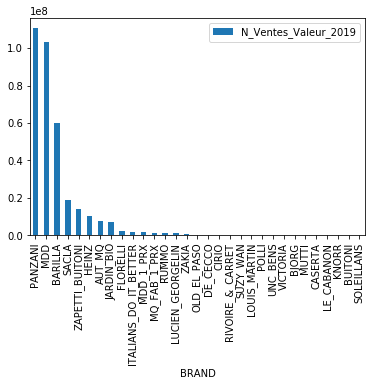

In [71]:
df_N_PROD_by_BRAND.plot.bar(x='BRAND', y='N_Ventes_Valeur_2019')

In [72]:
#check total of sales value = 343 809 410,40 €
#CHECK THAT N_PROD total sales = 84 991 284,70 €

round(df_N_PROD['N_Ventes_Valeur_2019'].sum(), 2) == 343809410.40

True

In [74]:
#------------------------------------------------
#SAVE N_PROD
df_N_PROD.to_csv('../N_NIELSEN/output_data/N_PROD_FR_Ventes_Valeur.csv')
df_N_PROD.to_excel('../N_NIELSEN/output_data/N_PROD_FR_Ventes_Valeur.xlsx')

In [225]:
#################################################
# 4) MERGING N_PROD AND O_PROD INTO M_PROD      #
#################################################

In [226]:
#################################################
# 4.1) Merge of the two databases

In [227]:
df_M_PROD = df_N_PROD.merge(df_O_PROD, left_on='N_EAN13', right_on='O_EAN13', how='left')
df_M_PROD.shape

(1443, 64)

In [228]:
df_M_PROD.columns

Index(['index', 'N_EAN13', 'N_MARQUE', 'N_SAME_PRODUCT', 'N_GAMME',
       'N_RECETTES', 'N_ORGANIC', 'N_FORMAT', 'N_WEIGHT_num', 'N_EMBALLAGE',
       'N_COMPTE', 'N_STD/PROMO', 'N_Ventes_Valeur_2019',
       'N_Ventes_Valeur_2018', 'N_ITEM', 'N_NIELSEN_DESCRIPTION',
       'N_INITIAL_INDEX', 'N_CATEGORY', 'N_COUNT', 'O_EAN13',
       'O_product_name_fr', 'O_product_name', 'O_brands', 'O_brands_tags_str',
       'O_brands_tags', 'O_serving_size', 'O_serving_quantity',
       'O_countries_hierarchy', 'O_cities_tags', 'O_manufacturing_places',
       'O_purchase_places', 'O_countries_tags', 'O_categories',
       'O_category_properties', 'O_pnns_groups_1', 'O_pnns_groups_2',
       'O_compared_to_category', 'O_interface_version_modified',
       'O_ingredients_n', 'O_ingredients_text', 'O_ingredients',
       'O_salt_content', 'O_max_salt_content', 'O_min_salt_content',
       'O_oil_content', 'O_max_oil_content', 'O_min_oil_content', 'O_oil_type',
       'O_nutriments', 'O_energy_100g'

In [229]:
df_M_PROD.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1443 entries, 0 to 1442
Data columns (total 64 columns):
index                                                      1443 non-null int64
N_EAN13                                                    1443 non-null object
N_MARQUE                                                   1443 non-null object
N_SAME_PRODUCT                                             1443 non-null object
N_GAMME                                                    1432 non-null object
N_RECETTES                                                 1432 non-null object
N_ORGANIC                                                  1443 non-null object
N_FORMAT                                                   1432 non-null object
N_WEIGHT_num                                               1443 non-null int64
N_EMBALLAGE                                                1443 non-null object
N_COMPTE                                                   1432 non-null object
N_STD/PROMO    

In [230]:
#check total of sales value = 343 809 410,40 €
#check total of sales volume = 84.991.284,70
df_M_PROD['N_Ventes_Valeur_2019'].sum()

343809410.40000004

In [231]:
#------------------------------------------------
#SAVE M-PROD
df_M_PROD.to_csv('output_data/M_PROD_N_EAN13.csv')
df_M_PROD.to_excel('output_data/M_PROD_N_EAN13.xlsx')

In [232]:
df_M_PROD.tail(10)

,index,N_EAN13,N_MARQUE,N_SAME_PRODUCT,N_GAMME,N_RECETTES,N_ORGANIC,N_FORMAT,N_WEIGHT_num,N_EMBALLAGE,...,O_sugars_100g,O_fruits_vegetables_nuts_estimate_from_ingredients_100g,O_proteins_100g,O_sodium_100g,O_salt_100g,O_nutrition_score_fr_100g,O_fiber_100g,O_nova_group_100g,O_COUNT,O_date_modified
1433,3063,3038352871303,PANZANI,PANZANI | LEGUMES | PT_LEGUME | TUB | NON_BIO,LEGUMES,PT_LEGUME,NON_BIO,PF,180,TUB,...,8.1,50.321429,2.7,1.12000,2.8000,9.0,2.7,4.0,1.0,20120622
1434,3064,3038359002335,PANZANI,PANZANI | LEGUMES | PT_LEGUME | TUB | NON_BIO,LEGUMES,PT_LEGUME,NON_BIO,PF,180,TUB,...,8.1,50.000000,2.7,1.12000,2.8000,9.0,2.7,4.0,1.0,20130323
1435,3065,3038359004544,PANZANI,PANZANI | LEGUMES | PT_LEGUME | TUB | NON_BIO,LEGUMES,PT_LEGUME,NON_BIO,PF,180,TUB,...,9.1,50.000000,2.9,1.16000,2.9000,11.0,1.7,4.0,1.0,20150316
1436,3066,3038359008603,PANZANI,PANZANI | LEGUMES | PT_LEGUME | TUB | NON_BIO,LEGUMES,PT_LEGUME,NON_BIO,PF,220,TUB,...,9.1,49.750000,2.9,1.16000,2.9000,11.0,1.7,4.0,1.0,20150316
1437,3067,3038359004551,PANZANI,PANZANI | LEGUMES | PT_LEGUME | TUB | NON_BIO,LEGUMES,PT_LEGUME,NON_BIO,PF,180,TUB,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,20150316
1438,3068,3038359002823,PANZANI,PANZANI | LEGUMES | PT_LEGUME | TUB | NON_BIO,LEGUMES,PT_LEGUME,NON_BIO,PF,180,TUB,...,8.1,NaN,2.7,1.12000,2.8000,NaN,NaN,NaN,1.0,20150316
1439,3069,3038359008498,PANZANI,PANZANI | LEGUMES | TOM_CUI_A_L'ORIGAN | TUB |...,LEGUMES,TOM_CUI_A_L'ORIGAN,NON_BIO,PF,180,TUB,...,10.0,49.000000,2.9,1.16000,2.9000,11.0,1.7,4.0,1.0,20150316
1440,3070,3038359005657,PANZANI,PANZANI | PESTO | PESTO_VERD | TUB | NON_BIO,PESTO,PESTO_VERD,NON_BIO,PF,160,TUB,...,6.1,0.000000,4.4,1.28000,3.2000,13.0,2.5,4.0,1.0,20150316
1441,3072,3038359001413,ZAKIA,ZAKIA | LEGUMES | TOMATE_PIMENTE | TUB | NON_BIO,LEGUMES,TOMATE_PIMENTE,NON_BIO,PF,180,TUB,...,8.1,50.050000,2.7,1.12000,2.8000,NaN,2.7,4.0,1.0,20150316
1442,3074,3021690021851,ZAPETTI_BUITONI,ZAPETTI_BUITONI | LEGUMES | NATURE | TUB | NON...,LEGUMES,NATURE,NON_BIO,PF,150,TUB,...,7.1,87.000000,1.7,0.56896,1.4224,1.0,1.9,4.0,1.0,20120622


In [233]:
############################################
# 4.2) Analysis of missing N_EAN13 in O_PROD

In [234]:
#--------------------------------------------
#     CREATION OF df_M_SAME_PROD
#--------------------------------------------
# columns kept must be sumable

df_M_SAME_PROD = df_M_PROD[['N_SAME_PRODUCT', 'N_COUNT', 'O_COUNT', 'N_Ventes_Valeur_2019', 'N_Ventes_Valeur_2018']].groupby(['N_SAME_PRODUCT']).sum().sort_values(by='N_Ventes_Valeur_2019', ascending=False)
df_M_SAME_PROD['MISSING_COUNT'] = df_M_SAME_PROD['N_COUNT'].astype(int) - df_M_SAME_PROD['O_COUNT'].astype(int)
df_M_SAME_PROD= df_M_SAME_PROD[['N_COUNT', 'O_COUNT','MISSING_COUNT', 'N_Ventes_Valeur_2019', 'N_Ventes_Valeur_2018']]
df_M_SAME_PROD.sort_values(by='N_Ventes_Valeur_2019', ascending=False)

,N_COUNT,O_COUNT,MISSING_COUNT,N_Ventes_Valeur_2019,N_Ventes_Valeur_2018
N_SAME_PRODUCT,,,,,
MDD | SAUCES_POUR_FECULENTS | | POT |,1,0.0,1,94370200.5,88010805.0
PANZANI | BOLO_CLASSIQUE | BOLOGNAISE | POT | NON_BIO,26,19.0,7,18522875.3,28628441.5
PANZANI | LEGUMES | PROVENCALE | POT | NON_BIO,17,10.0,7,11724186.2,11559762.7
BARILLA | PESTO | PESTO_VERD | POT | NON_BIO,4,3.0,1,11224787.3,10219195.7
PANZANI | LEGUMES | PT_LEGUME | TUB | NON_BIO,6,6.0,0,10511586.3,10266481.1
...,...,...,...,...,...
AUT_MQ | SCE_CLAS | ONCTUEUSE_AU_RIZ | POT | BIO,1,0.0,1,0.0,0.0
AUT_MQ | SCE_CLAS | NAPOLITAIN | POT | NON_BIO,1,0.0,1,0.0,4.3
AUT_MQ | SCE_CLAS | MELANGE_5_BAIES | DOY_PAC | NON_BIO,1,0.0,1,0.0,12.1


In [235]:
df_M_SAME_PROD.shape

(782, 5)

In [236]:
df_M_SAME_PROD_by_brand = df_M_PROD[['N_MARQUE', 'N_COUNT', 'O_COUNT', 'N_Ventes_Valeur_2019', 'N_Ventes_Valeur_2018']].groupby(['N_MARQUE']).sum().sort_values(by='N_Ventes_Valeur_2019', ascending=False)
df_M_SAME_PROD_by_brand['PERCENT_FOUND']=round(df_M_SAME_PROD_by_brand['O_COUNT']/df_M_SAME_PROD_by_brand['N_COUNT']*100)
print(df_M_SAME_PROD_by_brand['O_COUNT'].sum())
df_M_SAME_PROD_by_brand

1103.0


,N_COUNT,O_COUNT,N_Ventes_Valeur_2019,N_Ventes_Valeur_2018,PERCENT_FOUND
N_MARQUE,,,,,
PANZANI,179,140.0,110530977.0,110404242.2,78.0
MDD,9,0.0,103328156.2,96784464.6,0.0
BARILLA,79,62.0,60044389.8,53562429.8,78.0
SACLA,98,94.0,18916645.6,19612905.1,96.0
ZAPETTI_BUITONI,95,50.0,14282239.4,14628922.3,53.0
HEINZ,61,49.0,10337632.8,11089374.8,80.0
AUT_MQ,667,488.0,7864709.0,8203665.3,73.0
JARDIN_BIO,33,28.0,6930299.1,5999005.3,85.0
FLORELLI,38,38.0,2109366.9,2201410.6,100.0


In [237]:
df_M_SAME_PROD.info()

<class 'pandas.core.frame.DataFrame'>
Index: 782 entries, MDD | SAUCES_POUR_FECULENTS |  | POT |  to ZAPETTI_BUITONI | PESTO | PESTO_VERD | DOSE | NON_BIO
Data columns (total 5 columns):
N_COUNT                 782 non-null int64
O_COUNT                 782 non-null float64
MISSING_COUNT           782 non-null int64
N_Ventes_Valeur_2019    782 non-null float64
N_Ventes_Valeur_2018    782 non-null float64
dtypes: float64(3), int64(2)
memory usage: 36.7+ KB


In [238]:
#SAVE M_SAME_PROD
df_M_SAME_PROD.to_csv('output_data/M_SAME_PROD_N_EAN13.csv')
df_M_SAME_PROD.to_excel('output_data/M_SAME_PROD_N_EAN13.xlsx')

In [281]:
#-----------------------------------------------------------
#           CREATION OF df_M_SAME_PROD_MISSING 
#          (totally missing in OPEN FOOD FACTS)
#   !!!!! ATTENTION TO 'AUT MQ' (other brands)  !!!!!!!!!!
#-----------------------------------------------------------

df_M_SAME_PROD_MISSING = df_M_SAME_PROD[df_M_SAME_PROD['O_COUNT'] == 0].sort_values(by='N_Ventes_Valeur_2019',ascending=False)
df_M_SAME_PROD_MISSING.shape

(108, 5)

In [282]:
df_M_SAME_PROD_MISSING.head(20)

,N_COUNT,O_COUNT,MISSING_COUNT,N_Ventes_Valeur_2019,N_Ventes_Valeur_2018
N_SAME_PRODUCT,,,,,
MDD | SAUCES_POUR_FECULENTS | | POT |,1,0.0,1,94370200.5,88010805.0
MDD | SAUCES_POUR_FECULENTS | | BTE_FER |,1,0.0,1,4286886.3,4358804.4
MDD | SAUCES_POUR_FECULENTS | | TUB |,1,0.0,1,2102213.2,2184243.2
MDD_1_PRX | SAUCES_POUR_FECULENTS | | POT |,1,0.0,1,1688258.1,1750841.1
MDD | AUT_SCE | | POT |,1,0.0,1,1408037.2,1310021.9
MDD | SAUCES_POUR_FECULENTS | | BRIC |,1,0.0,1,424991.0,320040.0
MDD | SAUCES_POUR_FECULENTS | | FLA_PLAS |,1,0.0,1,286847.6,116514.8
MDD | SAUCES_POUR_FECULENTS | | DOY_PAC |,1,0.0,1,241084.2,333957.1
MDD | AUT_SCE | | BRIC |,1,0.0,1,139057.0,0.0


In [290]:
df_M_SAME_PROD_MISSING['N_COUNT'].unique()

array([1, 2])

In [295]:
#SAVE M_SAME_PROD_MISSING
df_M_SAME_PROD_MISSING.to_csv('output_data/M_SAME_PROD_N_EAN13_MISSING.csv')
df_M_SAME_PROD_MISSING.to_excel('output_data/M_SAME_PROD_N_EAN13_MISSING.xlsx')

In [292]:
print('sales of same_products with no match in OPENFF:', round(df_M_SAME_PROD_MISSING['N_Ventes_Valeur_2019'].sum(),0),'€')
print('number of same_products with no match in OPENFF:', round(df_M_SAME_PROD_MISSING['N_COUNT'].count()))
print('max sales of same_product with no match in OPENFF:', round(df_M_SAME_PROD_MISSING['N_Ventes_Valeur_2019'].max(),0),'€')

#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
# resultat trompeur car 
# - pour les marques dans 'AUT MQ' la correspondance n'est pas bonne
# - pour les MDD il ne peut y avoir de match (pas de EAN13 dans NIELSEN opur les MDD
#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

sales of same_products with no match in OPENFF: 105258575.0 €
number of same_products with no match in OPENFF: 108
max sales of same_product with no match in OPENFF: 94370200.0 €


In [293]:
#
df_M_SAME_PROD_MISSING[['N_Ventes_Valeur_2019', 'N_COUNT']].sum()

N_Ventes_Valeur_2019    105258575.3
N_COUNT                       112.0
dtype: float64

In [294]:
df_M_SAME_PROD_MISSING=df_M_SAME_PROD_MISSING.sort_values(by='N_Ventes_Valeur_2019',ascending=False).reset_index().head(15)

In [246]:
#################################################################
# 4.3) EAN13_PROXI
# to be finalized

In [247]:
#for same_prod in df_M_SAME_PROD :
#     si marque != 'AUT MQ' et 'FAB 1 PRX' 'MMD' 'MDD 1 PRX'
#         list_prod_same_prod == df_M_PROD['N_SAME_PROD']== same_prod
#         list_proxy_potential= df_M_PROD[isinstance(O_EAN13) + isinstance(O_ingredient_n)]
#.        list_to_check=A - B
#.        temp_proxy=list_proxy_potential.max()
#.        for prod in list to check
#             df_M_PROD['EAN13_PROXY'][i] =  temp_proxy 
#.        df_M_SAME_PROD['SAME_PROD_EAN_PROXY'][same_prod]= temp_proxy 


In [248]:
#creation of EAN13_PROXI
df_M_PROD['EAN13_PROXI'] = '0'

In [250]:
#TOP 5 EXAMPLES
top_5=['MDD | SAUCES_POUR_FECULENTS | | POT |',
       'PANZANI | BOLO_CLASSIQUE | BOLOGNAISE | POT | NON_BIO',
       'PANZANI | LEGUMES | PROVENCALE | POT | NON_BIO',
       'BARILLA | PESTO | PESTO_VERD | POT | NON_BIO',
       'PANZANI | LEGUMES | PT_LEGUME | TUB | NON_BIO']

In [253]:
#Analysis of OPENFF_data for a specific N_SAME_PRODUCT to find best EAN13_PROXI

#'PANZANI, BOLO CLASSIQUE, BOLOGNAISE, POT, '
same_prod_to_analyse=top_5[1]
temp = df_M_PROD[df_M_PROD['N_SAME_PRODUCT']==same_prod_to_analyse]
#filename=same_prod_to_analyse[:20] + '.csv'
#temp.to_csv('output_data/filename)

print(temp.shape)
temp[['N_EAN13','O_product_name','O_date_modified', 'O_ingredients_n' ,'O_ingredients', 'N_SAME_PRODUCT', 'N_WEIGHT_num', 'N_Ventes_Valeur_2019', 'N_MARQUE', 'N_GAMME', 'N_RECETTES', 'N_ORGANIC', 'N_FORMAT', 'N_EMBALLAGE']]

(26, 65)


,N_EAN13,O_product_name,O_date_modified,O_ingredients_n,O_ingredients,N_SAME_PRODUCT,N_WEIGHT_num,N_Ventes_Valeur_2019,N_MARQUE,N_GAMME,N_RECETTES,N_ORGANIC,N_FORMAT,N_EMBALLAGE
1111,3038354192208,NaN,NaN,NaN,NaN,PANZANI | BOLO_CLASSIQUE | BOLOGNAISE | POT | ...,600,0.0,PANZANI,BOLO_CLASSIQUE,BOLOGNAISE,NON_BIO,GF,POT
1112,3038359000850,Bolognaise,20120622,16.0,"['Pulpe de tomate', 'concentré de tomate', 'vi...",PANZANI | BOLO_CLASSIQUE | BOLOGNAISE | POT | ...,600,6.4,PANZANI,BOLO_CLASSIQUE,BOLOGNAISE,NON_BIO,GF,POT
1113,3038359004575,Bolognaise,20150316,15.0,"['Pulpe de tomates', 'concentré de tomates', '...",PANZANI | BOLO_CLASSIQUE | BOLOGNAISE | POT | ...,600,23115.3,PANZANI,BOLO_CLASSIQUE,BOLOGNAISE,NON_BIO,GF,POT
1115,3038354190808,Sauce Bolognaise,20120622,16.0,"['Pulpe de tomate', 'concentré de tomate', 'vi...",PANZANI | BOLO_CLASSIQUE | BOLOGNAISE | POT | ...,425,0.0,PANZANI,BOLO_CLASSIQUE,BOLOGNAISE,NON_BIO,MF,POT
1116,3038359000843,Sauce bolognaise,20150316,16.0,"['Pulpe de tomate', 'concentré de tomate', 'vi...",PANZANI | BOLO_CLASSIQUE | BOLOGNAISE | POT | ...,425,2343772.1,PANZANI,BOLO_CLASSIQUE,BOLOGNAISE,NON_BIO,MF,POT
1117,3038359007651,Bolognaise classique,20150316,16.0,"['Pulpe de tomates', 'concentré de tomates', '...",PANZANI | BOLO_CLASSIQUE | BOLOGNAISE | POT | ...,425,5817400.1,PANZANI,BOLO_CLASSIQUE,BOLOGNAISE,NON_BIO,MF,POT
1118,3038359008962,Sauce Bolognaise,20150316,18.0,"['Pulpe de tomates', 'concentré de tomates', '...",PANZANI | BOLO_CLASSIQUE | BOLOGNAISE | POT | ...,425,545124.1,PANZANI,BOLO_CLASSIQUE,BOLOGNAISE,NON_BIO,MF,POT
1119,3038354310800,Sauce bolognaise,20150316,16.0,"['Pulpe de tomate', 'concentré de tomate', 'vi...",PANZANI | BOLO_CLASSIQUE | BOLOGNAISE | POT | ...,500,0.0,PANZANI,BOLO_CLASSIQUE,BOLOGNAISE,NON_BIO,MF,POT
1120,3038359004155,Bolognaise classique,20150316,16.0,"['Pulpe de tomates', 'concentré de tomates', '...",PANZANI | BOLO_CLASSIQUE | BOLOGNAISE | POT | ...,500,5245204.3,PANZANI,BOLO_CLASSIQUE,BOLOGNAISE,NON_BIO,MF,POT
1121,3038352871310,Sauce bolognaise,20150316,16.0,"['Pulpe de tomate', 'concentré de tomate', 'vi...",PANZANI | BOLO_CLASSIQUE | BOLOGNAISE | POT | ...,425,0.0,PANZANI,BOLO_CLASSIQUE,BOLOGNAISE,NON_BIO,MF,POT


In [ ]:
#################################################################
# 5) M_PROD with selected brands (italians_do_it_better perimeter)
#################################################################

In [ ]:
#################################################################
# 6) M_PROD WITH sales > 100.000 €
#################################################################

In [274]:
temp = df_M_SAME_PROD[df_M_SAME_PROD['N_Ventes_Valeur_2019'] > 500000]
print('Total sales 2019 of product with sales > 100.000 €: \n', int(round(temp['N_Ventes_Valeur_2019'].sum())))
#temp

Total sales 2019 of product with sales > 100.000 €: 
 310577280


In [275]:
temp = df_M_SAME_PROD[df_M_SAME_PROD['N_Ventes_Valeur_2019'] > 500000]
print('Total sales 2019 of product with sales > 100.000 €: \n', int(round(temp['N_Ventes_Valeur_2019'].sum())))
temp.head(10)

Total sales 2019 of product with sales > 100.000 €: 
 310577280


,N_COUNT,O_COUNT,MISSING_COUNT,N_Ventes_Valeur_2019,N_Ventes_Valeur_2018
N_SAME_PRODUCT,,,,,
MDD | SAUCES_POUR_FECULENTS | | POT |,1,0.0,1,94370200.5,88010805.0
PANZANI | BOLO_CLASSIQUE | BOLOGNAISE | POT | NON_BIO,26,19.0,7,18522875.3,28628441.5
PANZANI | LEGUMES | PROVENCALE | POT | NON_BIO,17,10.0,7,11724186.2,11559762.7
BARILLA | PESTO | PESTO_VERD | POT | NON_BIO,4,3.0,1,11224787.3,10219195.7
PANZANI | LEGUMES | PT_LEGUME | TUB | NON_BIO,6,6.0,0,10511586.3,10266481.1
BARILLA | PESTO | PESTO_RGE | POT | NON_BIO,2,2.0,0,9527134.2,8487099.0
ZAPETTI_BUITONI | BOLO_CLASSIQUE | ITALIEN | BTE_FER | NON_BIO,11,7.0,4,9499660.5,9552474.8
PANZANI | BOLO_CLASSIQUE | BOLOGNAISE_PUR_BOEUF | POT | NON_BIO,8,6.0,2,9475195.8,403840.5
PANZANI | LEGUMES | TOMATES_BASILIC | POT | NON_BIO,9,4.0,5,7232904.1,6756760.1


In [276]:


temp = df_M_SAME_PROD[df_M_SAME_PROD['N_Ventes_Valeur_2019'] > 100000]

print('Number of products matched : ', df_M_PROD['N_Ventes_Valeur_2019'].count())
print('Sales of products matched : ', df_M_PROD['N_Ventes_Valeur_2019'].sum())

print('\nNumber of products with sales > 100.000 euros : ', temp['N_Ventes_Valeur_2019'].count())
print('Sales of products > 100.000 euros : ', temp['N_Ventes_Valeur_2019'].sum())

print('\nNumber of products with sales < 100.000 euros : ', temp['N_Ventes_Valeur_2019'].count() - df_M_PROD['N_Ventes_Valeur_2019'].count())
print('Sales of products < 100.000 euros : ', temp['N_Ventes_Valeur_2019'].sum() - df_M_PROD['N_Ventes_Valeur_2019'].sum())

#temp

Number of products matched :  1443
Sales of products matched :  343809410.40000004

Number of products with sales > 100.000 euros :  173
Sales of products > 100.000 euros :  335254102.5

Number of products with sales < 100.000 euros :  -1270
Sales of products < 100.000 euros :  -8555307.900000036


[Text(0, 0.5, 'number of unique products'), Text(0.5, 0, 'sales')]

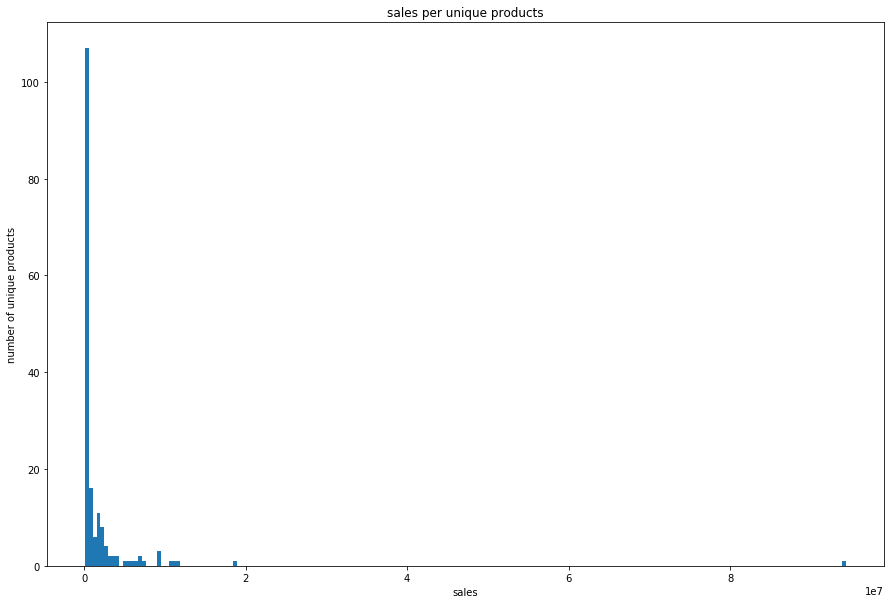

In [279]:
temp['N_Ventes_Valeur_2019'].plot.hist(bins=200, title='sales per unique products', figsize=(15,10)).set(xlabel='sales', ylabel='number of unique products')

In [296]:
temp.to_excel('output_data/sales_2019_100000.xlsx')